In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [65]:
anime = pd.read_csv("./data/anime.csv")
ratings = pd.read_csv("./data/rating.csv")

print("Anime shape:", anime.shape)
print("Ratings shape:", ratings.shape)


Anime shape: (12294, 7)
Ratings shape: (7813737, 3)


In [66]:
anime.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [67]:
anime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [68]:
anime.describe(include="all")


,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Saru Kani Gassen,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


## Clean episodes data

In [69]:
anime["episodes"] = anime["episodes"].replace("Unknown", np.nan)
anime["episodes"] = pd.to_numeric(anime["episodes"], errors="coerce")

anime["episodes"].isna().sum()


np.int64(340)

In [70]:
anime["episodes"] = anime["episodes"].fillna(
    anime.groupby("type")["episodes"].transform("median")
)


# Check missing values

In [71]:
missing = anime.isnull().mean().sort_values(ascending=False)
missing


rating      0.018708
genre       0.005043
type        0.002034
episodes    0.002034
anime_id    0.000000
name        0.000000
members     0.000000
dtype: float64

## Genre Analysis

In [72]:
# Split genres into lists
anime["genre"] = anime["genre"].fillna("Unknown")
anime["genre_list"] = anime["genre"].apply(lambda x: x.split(", "))



In [73]:
anime[["name", "genre_list"]].head()


,name,genre_list
0,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]"
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,Steins;Gate,"[Sci-Fi, Thriller]"
4,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ..."


## Handle Missing Ratings

In [74]:
anime["rating"].isna().sum()


np.int64(230)

In [75]:
anime["rating"] = anime["rating"].fillna(
    anime.groupby("type")["rating"].transform("mean")
)


In [76]:
#Content-Type Analysis
anime["type"].value_counts()


type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

## Rating Distribution

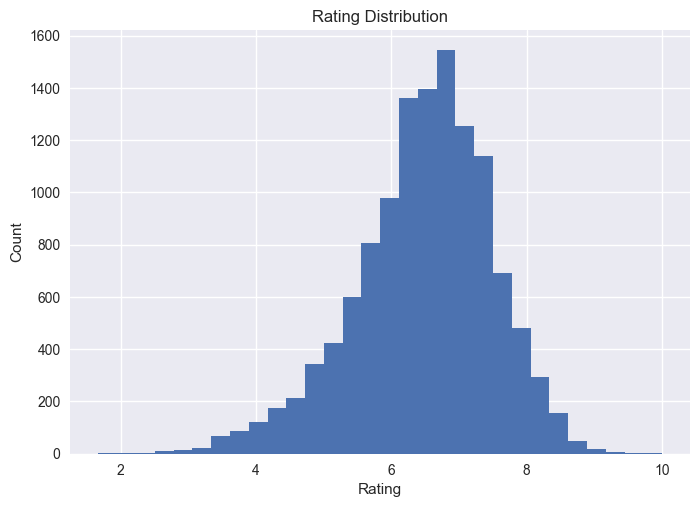

In [77]:
import matplotlib.pyplot as plt

plt.figure()
anime["rating"].hist(bins=30)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## Popularity vs Rating

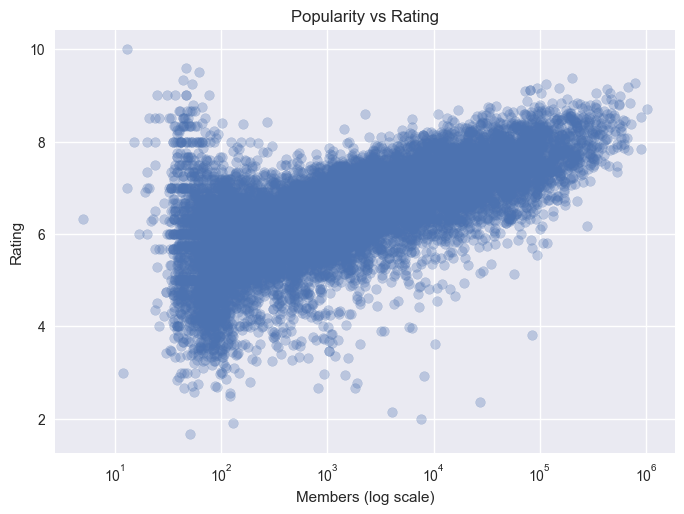

In [78]:
plt.figure()
plt.scatter(
    anime["members"],
    anime["rating"],
    alpha=0.3
)
plt.xscale("log")
plt.xlabel("Members (log scale)")
plt.ylabel("Rating")
plt.title("Popularity vs Rating")
plt.show()


## Genre Frequency

In [79]:
from collections import Counter

genre_counter = Counter()

for genres in anime["genre_list"]:
    genre_counter.update(genres)

top_genres = pd.DataFrame(
    genre_counter.most_common(20),
    columns=["genre", "count"]
)

top_genres


,genre,count
0,Comedy,4645
1,Action,2845
2,Adventure,2348
3,Fantasy,2309
4,Sci-Fi,2070
5,Drama,2016
6,Shounen,1712
7,Kids,1609
8,Romance,1464
9,School,1220


## Episode Length vs Rating

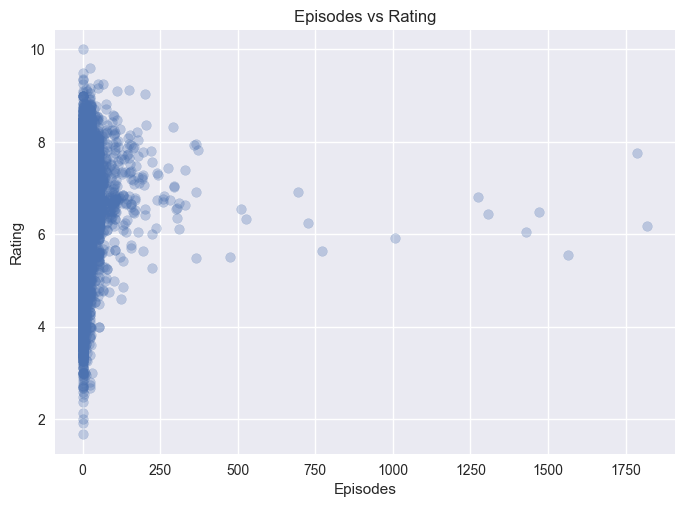

In [80]:
plt.figure()
plt.scatter(anime["episodes"], anime["rating"], alpha=0.3)
plt.xlabel("Episodes")
plt.ylabel("Rating")
plt.title("Episodes vs Rating")
plt.show()


## Plot Genre Distribution

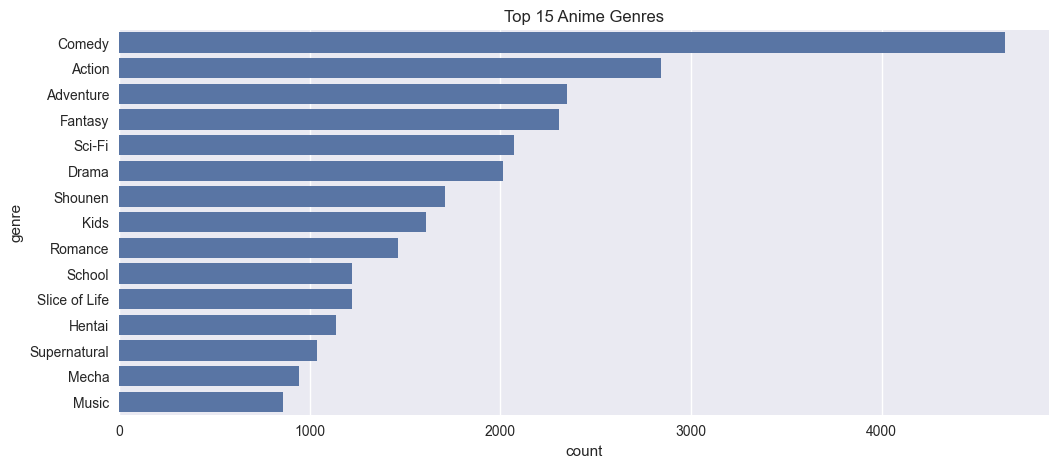

In [81]:
plt.figure(figsize=(12,5))
sns.barplot(
    data=top_genres.head(15),
    x="count",
    y="genre"
)
plt.title("Top 15 Anime Genres")
plt.show()


## Episodes Distribution (Binge vs Short Anime)

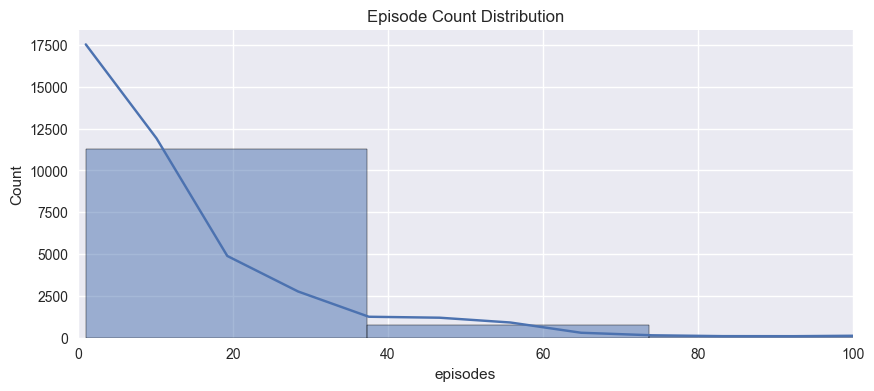

In [82]:
plt.figure(figsize=(10,4))
sns.histplot(anime["episodes"].dropna(), bins=50, kde=True)
plt.xlim(0, 100)
plt.title("Episode Count Distribution")
plt.show()


## Score Distribution (Quality Landscape)

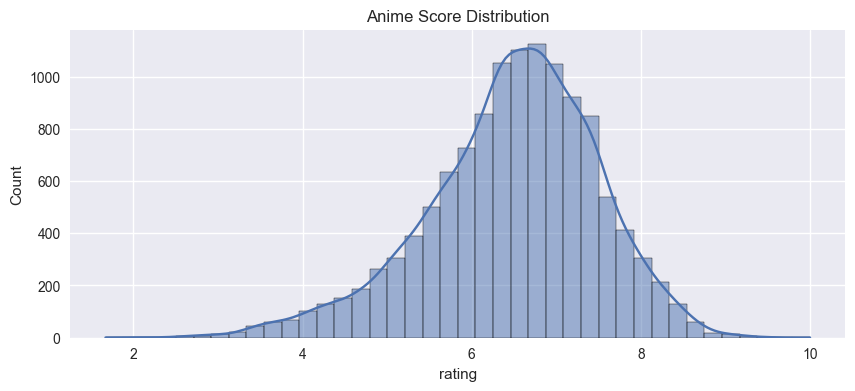

In [83]:
plt.figure(figsize=(10,4))
sns.histplot(anime["rating"].dropna(), bins=40, kde=True)
plt.title("Anime Score Distribution")
plt.show()


## ML-Ready Feature Set

In [84]:
ml_df = anime[
    ["episodes", "members", "rating", "genre_list", "type"]
].copy()


## FEATURE ENGINEERING

In [85]:
#final cleanup dataset
df = anime.copy()

df = df[[
    "episodes",
    "members",
    "rating",
    "genre_list",
    "type"
]]

df.dropna(inplace=True)


In [86]:
#Episode Bucketing
def episode_bucket(ep):
    if ep <= 1:
        return "single"
    elif ep <= 12:
        return "short"
    elif ep <= 26:
        return "medium"
    elif ep <= 60:
        return "long"
    else:
        return "very_long"

df["episode_bucket"] = df["episodes"].apply(episode_bucket)


## One-Hot Encode Genres

In [87]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

genre_encoded = mlb.fit_transform(df["genre_list"])
genre_df = pd.DataFrame(
    genre_encoded,
    columns=mlb.classes_,
    index=df.index
)


In [88]:
## Encode Type & Episode Bucket
df = pd.get_dummies(
    df,
    columns=["type", "episode_bucket"],
    drop_first=True
)


## Data splitting

In [89]:
X = pd.concat(
    [df.drop(columns=["rating", "genre_list"]), genre_df],
    axis=1
)

y = df["rating"]


## Model Training

In [90]:
from sklearn.ensemble import RandomForestRegressor


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluate

In [92]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))


MAE: 0.47614881039009804


## EXPORT MODEL

In [93]:
import joblib

joblib.dump(model, "model.pkl")


['model.pkl']

In [94]:
model_features = list(X.columns)

joblib.dump(model_features, "model_features.pkl")


['model_features.pkl']

In [95]:
top_genres = list(genre_df.columns)

joblib.dump(top_genres, "top_genres.pkl")


['top_genres.pkl']

## Test Reload

In [96]:
loaded_model = joblib.load("model.pkl")
loaded_features = joblib.load("model_features.pkl")

sample = X_test.iloc[:1]
print(loaded_model.predict(sample))


[6.45427873]
